# Project: E-commerce electronic store 



- Dataset name: appliances and electronics online store
- Dataset source: Kaggle
- Dataset url: https://www.kaggle.com/mkechinov/ecommerce-purchase-history-from-electronics-store


#### - Project objectives: 

•	Analyzing the online sales data.

•	Identify the potential customer group from transactional data to improve the marketing campaign by designing profitable strategies; hence to increase the sales.


#### Steps:-

1)	Exploratory data analysis (EDA)

2)	Check, clean and prepare the data for analysis.

3)	Perform RFM analysis.

4)	Visualize the data.

5)  Calculate the RFM score.

6)  Identify segments and interpret the findings.

7)  K-means clustering algorithm based on the RFM values. 


In [65]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt 
import numpy as np

In [66]:
# dataset import
data=pd.read_csv('kz.csv')

# EDA (Exploratory Data Anyalysis)

In [67]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [5]:
# Counting the unique values
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nUnique values :  \n",data.nunique())

Rows     :  2633521
Columns  :  8

Features : 
 ['event_time', 'order_id', 'product_id', 'category_id', 'category_code', 'brand', 'price', 'user_id']

Unique values :  
 event_time       1316174
order_id         1435266
product_id         25113
category_id          900
category_code        510
brand              23021
price               2802
user_id            98262
dtype: int64


In [48]:
#Top selling Brands
data.brand.value_counts()

samsung                358928
ava                    118161
tefal                   78653
apple                   74709
huawei                  57438
                        ...  
1515915625512526035         1
1515915625512762385         1
1515915625514155394         1
1515915625514598709         1
1515915625513445930         1
Name: brand, Length: 23021, dtype: int64

# Data preprossing

In [69]:
# exploring null values
data.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [70]:
#execluding null values in the following features (brands, Category_code, Category_ID)
data= data[pd.notnull(data['brand'])]
data= data[pd.notnull(data['category_code'])]
data= data[pd.notnull(data['category_id'])]

In [71]:
#Take all the rows where customer ID not equal to null
data= data[pd.notnull(data['user_id'])]

In [72]:
# converting the user-id from float to intger to be easier for reading
data['user_id'] = data['user_id'].apply(np.int64)

In [73]:
data.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [74]:
#datatype casting for event time, converting to datetime64
# tz_localize(None) it helps in excluding the timezone when getting the recency.
data['event_time'] = pd.to_datetime(data.event_time).dt.tz_localize(None) 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420718 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   event_time     420718 non-null  datetime64[ns]
 1   order_id       420718 non-null  int64         
 2   product_id     420718 non-null  int64         
 3   category_id    420718 non-null  float64       
 4   category_code  420718 non-null  object        
 5   brand          420718 non-null  object        
 6   price          420718 non-null  float64       
 7   user_id        420718 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 28.9+ MB


In [76]:
data.head(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1515915625441993984
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1515915625441993984
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1515915625447879424
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1515915625447879424
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1515915625450382848


In [77]:
data.tail(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633515,2020-11-21 10:08:54,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1515915625513809920
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1515915625514888704
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1515915625514891264
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1515915625514834176
2633520,2020-11-21 10:10:30,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1515915625514834176


# Data insights

In [78]:
#brands sharing among users.
brands_data=data[['brand','user_id','category_code']].drop_duplicates()
brands_data.brand.value_counts()[:10]

samsung    47872
apple      21792
ava        14594
lg         10629
tefal       9352
xiaomi      8455
bosch       7082
philips     6472
huawei      6149
asus        6016
Name: brand, dtype: int64

<AxesSubplot:>

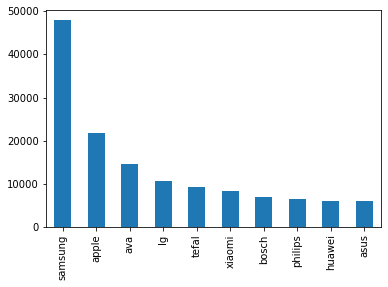

In [79]:
# Plot the top 10 brands 
brands_data.brand.value_counts()[:10].plot(kind='bar')

- The best selling brand among our customers is the Samsung brand where 47872 unique customers purchase it, followed by Apple, ava and Lg with 21792,14594,10629 respectively.

- Running campaigns using our top selling brands as key products getting more profits, at the same time understanding reasons behind the low selling of the other brands is neccessary to deceide either to drop them out or putting more marketing efforts.

In [80]:
#Categories sharing among users
brands_data.category_code.value_counts()[:10]

electronics.smartphone              53738
computers.notebook                  17534
electronics.audio.headphone         14717
appliances.kitchen.refrigerators    14492
electronics.video.tv                11359
appliances.environment.vacuum       10164
appliances.kitchen.washer            9183
appliances.kitchen.kettle            9072
computers.peripherals.mouse          7709
appliances.kitchen.blender           6317
Name: category_code, dtype: int64

<AxesSubplot:>

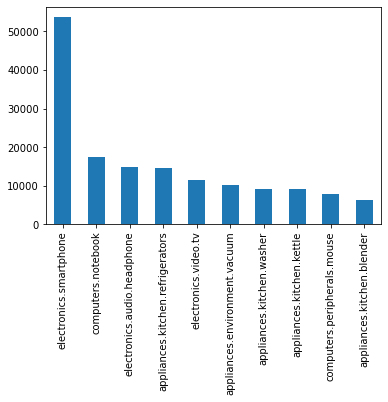

In [81]:
# Plot the top 10 products category 
brands_data.category_code.value_counts()[:10].plot(kind='bar')

- Smart phones are way much more selling than anyother item with 53738 number of unique selling compared to Notebook and headphones which represent 17534 and 14717 respectively.

- Using cross-selling technique in selling related products to smartphone such as (headphone- mouse) is recommended approach to raise selling of these products.

- Appliances kitchen products are durable goods which need more offers and add-on services interms of maintenance, gurantee.

In [82]:
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1515915625441993984
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1515915625441993984
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1515915625447879424
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1515915625447879424
5,2020-04-26 08:45:57,2295716521449619559,1515966223509261697,2.268105e+18,furniture.kitchen.table,maestro,39.33,1515915625450382848
...,...,...,...,...,...,...,...,...
2633515,2020-11-21 10:08:54,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1515915625513809920
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1515915625514888704
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1515915625514891264
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1515915625514834176


In [83]:
# Check Min and Max dates
print(data['event_time'].min())
print(data['event_time'].max())

1970-01-01 00:33:40
2020-11-21 10:10:30


In [84]:
# RFM is more effective when it's measured on 1 year or 2, we here set the last year.
filter_data = data[(data['event_time'] > '2019-11-21')]
print(filter_data['event_time'].min())
print(filter_data['event_time'].max())

2020-01-05 04:06:18
2020-11-21 10:10:30


In [85]:
#Reorder the columns, droping the category_id
filter_data=filter_data[['user_id','brand','category_code','price','product_id','order_id','event_time']]

In [86]:
filter_data

,user_id,brand,category_code,price,product_id,order_id,event_time
0,1515915625441993984,samsung,electronics.tablet,162.01,1515966223509089906,2294359932054536986,2020-04-24 11:50:39
1,1515915625441993984,samsung,electronics.tablet,162.01,1515966223509089906,2294359932054536986,2020-04-24 11:50:39
2,1515915625447879424,huawei,electronics.audio.headphone,77.52,2273948319057183658,2294444024058086220,2020-04-24 14:37:43
3,1515915625447879424,huawei,electronics.audio.headphone,77.52,2273948319057183658,2294444024058086220,2020-04-24 14:37:43
5,1515915625450382848,maestro,furniture.kitchen.table,39.33,1515966223509261697,2295716521449619559,2020-04-26 08:45:57
...,...,...,...,...,...,...,...
2633515,1515915625513809920,lg,electronics.video.tv,370.35,1515966223509088622,2388440981134693941,2020-11-21 10:08:54
2633516,1515915625514888704,oppo,electronics.smartphone,138.87,1515966223526602848,2388440981134693942,2020-11-21 10:10:01
2633517,1515915625514891264,apple,electronics.smartphone,418.96,1515966223509089282,2388440981134693943,2020-11-21 10:10:13
2633518,1515915625514834176,vitek,appliances.personal.scales,12.48,1515966223509089917,2388440981134693944,2020-11-21 10:10:30


In [87]:
filter_data.price.describe()

count    419890.000000
mean        254.281619
std         321.167613
min           0.000000
25%          39.330000
50%         138.870000
75%         347.200000
max       11574.050000
Name: price, dtype: float64

In [88]:
filter_data = filter_data[(filter_data['price'] > 0)]
filter_data.price.describe()

count    419886.000000
mean        254.284041
std         321.168184
min           0.020000
25%          39.330000
50%         138.870000
75%         347.200000
max       11574.050000
Name: price, dtype: float64

In [89]:
#New time frame of the data
print(filter_data['event_time'].min())
print(filter_data['event_time'].max())

2020-01-05 04:06:18
2020-11-21 10:10:30


# Perform RFM Analysis

In [90]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419886 entries, 0 to 2633520
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        419886 non-null  int64         
 1   brand          419886 non-null  object        
 2   category_code  419886 non-null  object        
 3   price          419886 non-null  float64       
 4   product_id     419886 non-null  int64         
 5   order_id       419886 non-null  int64         
 6   event_time     419886 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 25.6+ MB


In [91]:
# Store a date as a reference point for recency calculations which will be set one month after the max-time of our dataset.
PRESENT = dt.datetime(2020, 12, 21)

In [92]:
filter_data['event_time'].head()

0   2020-04-24 11:50:39
1   2020-04-24 11:50:39
2   2020-04-24 14:37:43
3   2020-04-24 14:37:43
5   2020-04-26 08:45:57
Name: event_time, dtype: datetime64[ns]

In [93]:
filter_data['order_id'].value_counts().head()
# number of items purchased per each order

2388440981134650624    16
2367189642958078714    14
2353235234377433386    14
2388440981134664238    14
2388440981134671539    14
Name: order_id, dtype: int64

In [94]:
#aggregate the total price
orders = filter_data.groupby(['order_id', 'event_time', 'user_id']).agg({'price': lambda x: x.sum()}).reset_index()
orders.head()

,order_id,event_time,user_id,price
0,2294359932054536986,2020-04-24 11:50:39,1515915625441993984,324.02
1,2294444024058086220,2020-04-24 14:37:43,1515915625447879424,155.04
2,2295716521449619559,2020-04-26 08:45:57,1515915625450382848,39.33
3,2295740594749702229,2020-04-26 09:33:47,1515915625448766464,5548.04
4,2295902490203259134,2020-04-26 14:55:26,1515915625450561280,462.94


In [95]:
# grouping by each user, calculating the recency in days, number of orders and the total price he pay. 
rfm= filter_data.groupby('user_id').agg({'event_time': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                        'price': lambda price: price.sum()})

In [96]:
rfm

,event_time,order_id,price
user_id,,,
1515915625439952128,164,1,416.64
1515915625440038400,53,2,56.43
1515915625440051456,34,12,5984.92
1515915625440099840,75,7,3785.72
1515915625440121600,159,2,182.83
...,...,...,...
1515915625514887424,29,1,208.31
1515915625514887936,29,1,3472.20
1515915625514888704,29,2,277.74


In [97]:
# Rename the columns 
rfm.columns=['recency','frequency','monetary']

In [98]:
rfm['recency'] = rfm['recency'].astype(int)

In [100]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [101]:
rfm.head()

,recency,frequency,monetary
user_id,,,
1515915625439952128,164,1,416
1515915625440038400,53,2,56
1515915625440051456,34,12,5984
1515915625440099840,75,7,3785
1515915625440121600,159,2,182


array([[<AxesSubplot:title={'center':'recency'}>]], dtype=object)

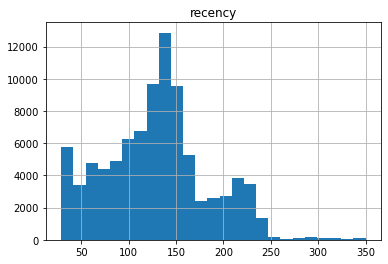

In [102]:
# Histogram for Recency Data
rfm.hist(column='recency', bins=25)

- The histogram represents the distribution of the variance between the present date and the last purchase date of the customers which is giving the number of days since the last purchase is done by a customer. we have nearly 6000 of our cutsomers who have purchased in the last 25 days followed by nearly 3200 purchases in between 25-50 days, however big number of our clients havn't purchased in between 100 up to 150 days which is long time and need quick action.

array([[<AxesSubplot:title={'center':'frequency'}>]], dtype=object)

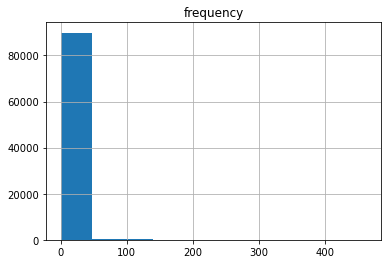

In [50]:
# Histogram for Frequency Data

rfm.hist(column='frequency', bins=10)

- The frequency is how often our customer makes a purchase. Total number of purchases more than 80000 times in the first 110 days which gives indication of our performance over that period of time.

array([[<AxesSubplot:title={'center':'monetary'}>]], dtype=object)

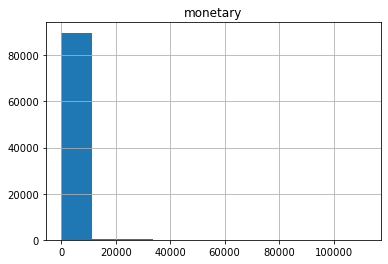

In [51]:
# Histogram for Monetary Data
rfm.hist(column='monetary', bins=10)

- The graph distribution shows that the amount of cash spent between 0 and 35000 is occured around 80000 times

In [103]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[0.64160541 0.19915623 0.21676262]
 [1.4007364  0.14422133 0.31948785]
 [1.75032644 0.40512757 1.37205434]
 ...
 [1.84232382 0.14422133 0.25642597]
 [1.84232382 0.19915623 0.07152055]
 [1.84232382 0.19915623 0.21619192]]


In [104]:
# Save the cleaned file for further analysis
rfm.to_csv('rfm_f_project.csv')

In [105]:
# Use quintiles to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 80.0, 0.4: 119.0, 0.6: 139.0, 0.8: 167.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 4.0},
 'monetary': {0.2: 124.0, 0.4: 313.0, 0.6: 648.0, 0.8: 1343.199999999997}}

In [106]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [107]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [108]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
user_id,,,,,,,
1515915625439952128,164,1,416,2,1,3,213
1515915625440038400,53,2,56,5,3,1,531
1515915625440051456,34,12,5984,5,5,5,555
1515915625440099840,75,7,3785,5,5,5,555
1515915625440121600,159,2,182,2,3,2,232


In [109]:
# Create the customer segments. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'High risk',
    '[1-2]5': 'Risk',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
user_id,,,,,,,,
1515915625439952128,164,1,416,2,1,3,213,High risk
1515915625440038400,53,2,56,5,3,1,531,champions
1515915625440051456,34,12,5984,5,5,5,555,champions
1515915625440099840,75,7,3785,5,5,5,555,champions
1515915625440121600,159,2,182,2,3,2,232,High risk


In [110]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)
segments_counts

Risk                2484
new customers       9707
needs attention    11126
loyal customers    15898
champions          17927
High risk          33638
Name: Segment, dtype: int64

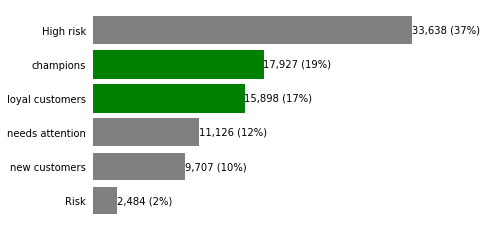

In [111]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

We can intrepret our finidnings based on the RFM anlaysis as the following:- 

1) "High risk", "Risk" categories are representing 33638, 2484 about 37% and 2% respectively. customers haven't purchased since long time as well as their purchasing frequncy weren't high.

* Required action: this segment needs the highest attention and quick actions in order to understand why this category is having this poor perfomance like:-

- Special customer care.
- Developing tactical marketing startegy include but not limited to tailored email marketing campaigns, push notifications and motivational ads targeting those segments thru various platforms.

2) "Needs attention" segment is 11,126 and represent 12%.

* Required action:Tailored marketing startegy with conversion objective is important, targeting them with continuos offers, executing retargeting campaigns to turn them to loyal customers. 


3) "New Customers" segment are 9707 about 10% which is good percentage.

* Required action: Special attention to this segment as the price of getting new customers is high, we need to retain them and keep engageing, providing excellence in service in the first period is a must.

4) "Champions", "Loyal Customers" segments are 17927, 15898 shaping 19% and 17% respecitvely, mainly they who make money to the company as the price of retaining them is still lower than getting new customers.

* Required action: Providing attractive loyality program, special offers, weekely promotions and excellence in service are tactics can be including in the market startegy for those segements. 


# Clustering Analysis

In [113]:
#Load the saved rfm data
rfm = pd.read_csv('rfm_f_project.csv', index_col ='user_id')

In [114]:
rfm.head()

,recency,frequency,monetary
user_id,,,
1515915625439952128,164,1,416
1515915625440038400,53,2,56
1515915625440051456,34,12,5984
1515915625440099840,75,7,3785
1515915625440121600,159,2,182


<AxesSubplot:>

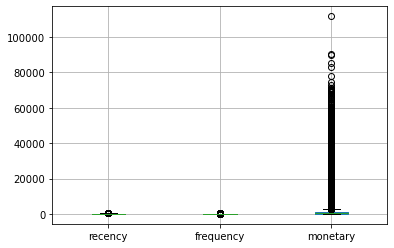

In [115]:
# Create box plots to check for outliers
rfm.boxplot()

In [116]:
# Calculate Z scores to normalize the data
from scipy import stats
z = np.abs(stats.zscore(rfm))
print(z)

[[0.64160541 0.19915623 0.21676262]
 [1.4007364  0.14422133 0.31948785]
 [1.75032644 0.40512757 1.37205434]
 ...
 [1.84232382 0.14422133 0.25642597]
 [1.84232382 0.19915623 0.07152055]
 [1.84232382 0.19915623 0.21619192]]


In [117]:
#Removing the ouliers in our RFM dataset
rfm= rfm[(z < 3).all(axis=1)]

In [118]:
rfm.shape

(89315, 3)

- We have removed around 1465 data points which count as outliers

<AxesSubplot:>

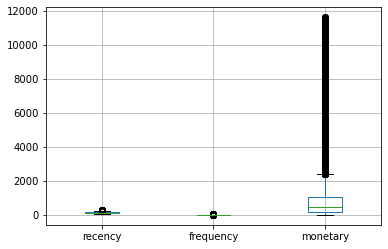

In [119]:
# Box plots cleaned  to check for outliers
rfm.boxplot()

- After get ride of outliers, We can see that the minimum and maximum value are within 2000, while the upper extreme are only up to 12000.

# Perform cluster analysis using K-means clustering

Here, we use unsupervised algorithms to make inferences on our dataset, using only input vectors without referring to known, or labelled, outcomes. We try to understand the structure of our data in clusters.

In [121]:
X = rfm

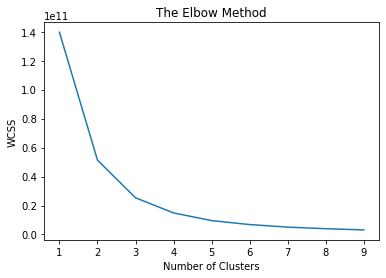

In [122]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

* Getting the best cluster numbers using the elbow method, here we gonna use 2 as a number of clusters.

In [123]:
# Fitting K Means to the Datatset using k = 2
# fit and predict the data 
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(X)

In [124]:
y_kmeans

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
# Adding cluster ID to the dataframe & setting which customer is in which cluster
rfm['Cluster_ID'] = y_kmeans

In [126]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
user_id,,,,
1515915625439952128,164,1,416,0
1515915625440038400,53,2,56,0
1515915625440051456,34,12,5984,1
1515915625440099840,75,7,3785,1
1515915625440121600,159,2,182,0


- The Clustering alogrithim group the customers among 2 clusters (0,1)

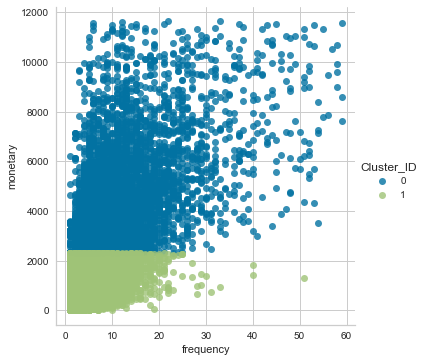

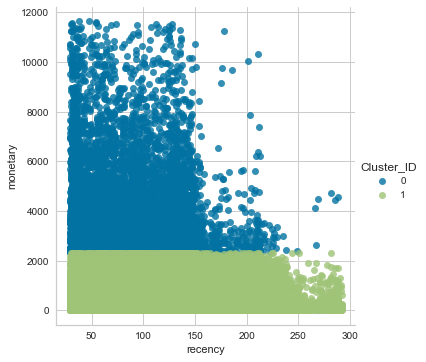

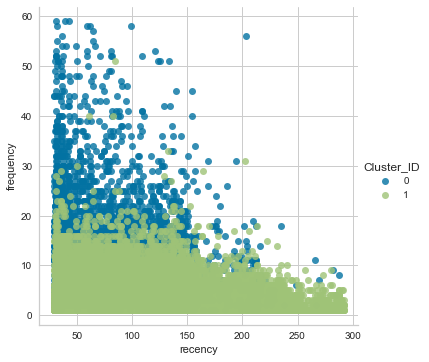

In [136]:
# We here viualize the clusters interms of the RFM
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

1) Frequency vs monetary :  

- Cluster 1 is the lowest in terms of frequency (0-20) with few data points are increasignly scattered and Monetary range around (0-2100).
- Cluster 0 comes the highest with frequency distributed along x-axis with higt denisty between (0-30) and Monetary range between (2100-12000).


2) Recency vs monetary :
- Cluster 1 recency is horizontally distributed along x-axis recency.
- Cluster 0 is the better cluster with a least overall recency and the higest monetary.

3) Frequency vs Recency:
- Cluster 1 is distributed horizntally along x-axis and up to nearly 15 times freqency, while cluster 0 is scattered vertically along the frequncy with better recency than cluster 1.

# Evaluate clustering using silhouette score

In [129]:
pip install yellowbrick

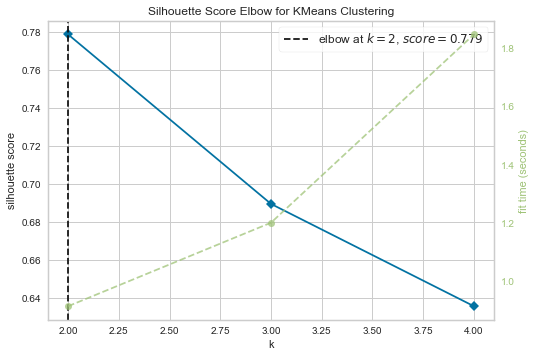

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [130]:
# Silhouette Score for K means
# Import ElbowVisualizer

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,5),metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



* Using the Silhouette Score for K means shows that the best kmean is 2 and our score is 0.779.